# **EDA**

In [40]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
#Read The Data
df = pd.read_csv('1A.tsv', sep='\t')
df.head()

,ID,Registration Date,Drug,Birth Date,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,2023/11/07,D-penicillamine,1966/03/07,F,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage4
1,2,2012/08/16,D-penicillamine,1968/07/01,F,N,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,stage_3
2,3,2022/03/05,D-penicillamine,1954/11/15,M,N,N,S,1.4,NaN,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage4
3,4,2019/09/04,D-penicillamine,1970/03/16,F,N,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage4
4,5,2020/10/29,Placebo,1986/11/03,F,N,Y,N,3.4,NaN,3.53,143.0,671.0,113.15,72.0,136.0,10.9,stage_3


In [42]:
# Check for data types, null values, and basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         418 non-null    int64  
 1   Registration Date          418 non-null    object 
 2   Drug                       312 non-null    object 
 3   Birth Date                 418 non-null    object 
 4   Gender                     418 non-null    object 
 5   Ascites                    312 non-null    object 
 6   Hepatomegaly               312 non-null    object 
 7   Edema                      418 non-null    object 
 8   Bilirubin                  418 non-null    float64
 9   Cholesterol                80 non-null     float64
 10  Albumin                    418 non-null    float64
 11  Copper                     310 non-null    float64
 12  Alkaline Phospatase (U/L)  312 non-null    float64
 13  SGOT                       312 non-null    float64

This data consists of 418 entries with 18 columns, which include patient medical information such as ID, registration date, liver disease-related data, and various medical values (such as bilirubin, albumin, and others). Some columns have missing values, especially in columns related to cholesterol, ascites, hepatomegaly, and others.

In [43]:
summary_stats = df.describe()
summary_stats

,ID,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin
count,418.000000,418.000000,80.000000,418.000000,310.000000,312.000000,312.000000,418.000000,407.000000,416.000000
mean,209.500000,3.220813,358.662500,3.497440,97.648387,1982.655769,122.556346,83.803828,257.024570,10.731731
std,120.810458,4.407506,230.414099,0.424972,85.613920,2140.388824,56.699525,79.603693,98.325585,1.022000
min,1.000000,0.300000,149.000000,1.960000,4.000000,289.000000,26.350000,-1.000000,62.000000,9.000000
25%,105.250000,0.800000,236.000000,3.242500,41.250000,871.500000,80.600000,-1.000000,188.500000,10.000000
50%,209.500000,1.400000,284.500000,3.530000,73.000000,1259.000000,114.700000,85.000000,251.000000,10.600000
75%,313.750000,3.400000,409.500000,3.770000,123.000000,1980.000000,151.900000,127.750000,318.000000,11.100000
max,418.000000,28.000000,1480.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000


In [44]:
#checking missing value
miss_values = df.isna().sum()
miss_values

ID                             0
Registration Date              0
Drug                         106
Birth Date                     0
Gender                         0
Ascites                      106
Hepatomegaly                 106
Edema                          0
Bilirubin                      0
Cholesterol                  338
Albumin                        0
Copper                       108
Alkaline Phospatase (U/L)    106
SGOT                         106
Tryglicerides                  0
Platelets                     11
Prothrombin                    2
Stage                          6
dtype: int64

In [45]:
# Handling missing value

# delete "Cholesterol"
df = df.drop(columns=["Cholesterol"])

# delete row with missing value
df = df.dropna().reset_index(drop=True)

# check missing value again
miss_valuess = df.isna().sum()
miss_valuess

ID                           0
Registration Date            0
Drug                         0
Birth Date                   0
Gender                       0
Ascites                      0
Hepatomegaly                 0
Edema                        0
Bilirubin                    0
Albumin                      0
Copper                       0
Alkaline Phospatase (U/L)    0
SGOT                         0
Tryglicerides                0
Platelets                    0
Prothrombin                  0
Stage                        0
dtype: int64

In [46]:
# check duplicated data
df.duplicated().sum()

0

In [47]:
df.nunique()

ID                           306
Registration Date            295
Drug                           5
Birth Date                   303
Gender                         2
Ascites                        2
Hepatomegaly                   2
Edema                          3
Bilirubin                     85
Albumin                      135
Copper                       157
Alkaline Phospatase (U/L)    291
SGOT                         179
Tryglicerides                144
Platelets                    210
Prothrombin                   43
Stage                          4
dtype: int64

The unique values displayed show the number of entries with missing data in each column. Here’s the interpretation:

ID: 306 entries have missing values.
Registration Date: 295 entries have missing values.
Drug: 5 entries have missing values, indicating this data is nearly complete.
Birth Date: 303 entries have missing values.
Gender: 2 entries have missing values.
Ascites, Hepatomegaly, Edema: Each has 2 to 3 entries with missing values, almost complete data.
Bilirubin: 85 entries have missing values.
Albumin: 135 entries have missing values.
Copper: 157 entries have missing values.
Alkaline Phospatase (U/L): 291 entries have missing values.
SGOT: 179 entries have missing values.
Tryglicerides: 144 entries have missing values.
Platelets: 210 entries have missing values.
Prothrombin: 43 entries have missing values.
Stage: 4 entries have missing values, nearly complete data.
Overall, many columns have missing values, with some columns having a significant amount of missing data, such as ID, Registration Date, and Alkaline Phospatase (U/L).

In [48]:
# change "Birth Date" and "Registration Date" into datetime format
df['Birth Date'] = pd.to_datetime(df['Birth Date'], errors='coerce')  
df['Registration Date'] = pd.to_datetime(df['Registration Date'], errors='coerce')  

# age based on "Registration Date"
df['Age'] = (df['Registration Date'] - df['Birth Date']).dt.days // 365

# check the age based on registration date
print(df[['Birth Date', 'Registration Date', 'Age']].head())


  Birth Date Registration Date  Age
0 1966-03-07        2023-11-07   57
1 1968-07-01        2012-08-16   44
2 1954-11-15        2022-03-05   67
3 1970-03-16        2019-09-04   49
4 1986-11-03        2020-10-29   34


In [49]:
df.drop(columns=['Birth Date'], inplace=True)
df.head()

,ID,Registration Date,Drug,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age
0,1,2023-11-07,D-penicillamine,F,Y,Y,Y,14.5,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage4,57
1,2,2012-08-16,D-penicillamine,F,N,Y,N,1.1,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,stage_3,44
2,3,2022-03-05,D-penicillamine,M,N,N,S,1.4,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage4,67
3,4,2019-09-04,D-penicillamine,F,N,Y,S,1.8,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage4,49
4,5,2020-10-29,Placebo,F,N,Y,N,3.4,3.53,143.0,671.0,113.15,72.0,136.0,10.9,stage_3,34


In [50]:
# Cleaning 'Drug' column by converting to lowercase and correcting values
df['Drug'] = df['Drug'].str.lower()
df['Drug'] = df['Drug'].replace({'lacebo': 'placebo'})


drug_counts = df['Drug'].value_counts()


print(drug_counts)


Drug
d-penicillamine    155
placebo            151
Name: count, dtype: int64


In [51]:
import re
# Function to clean and standardize the format of the 'Stage' column
def clean_stage(stage):

    stage = str(stage).lower()  # Convert to lowercase
    stage = stage.replace('_', ' ')  # Replace underscores with spaces
    stage = stage.strip()  # Remove leading/trailing spaces
    stage = ' '.join(stage.split())  # Remove excess spaces in between
    # Add space between "stage" and number if the number is directly attached
    stage = re.sub(r'(stage)(\d+)', r'\1 \2', stage)  # Example: "stage4" -> "stage 4"
    return stage.title()  # Convert to title case (e.g., "Stage 1")

# Apply function to the 'Stage' column
df['Stage'] = df['Stage'].apply(clean_stage)

# Check the result
print("Unique values in the 'Stage' column after cleaning:")
print(df['Stage'].unique())


Nilai unik dalam kolom Stage setelah pembersihan:
['Stage 4' 'Stage 3' 'Stage 2' 'Stage 1']



Stage Distribution:
Stage
Stage 3    118
Stage 4    108
Stage 2     65
Stage 1     15
Name: count, dtype: int64


C:\Users\Joseph Elk\AppData\Local\Temp\ipykernel_35128\1317284747.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Stage", palette="viridis")


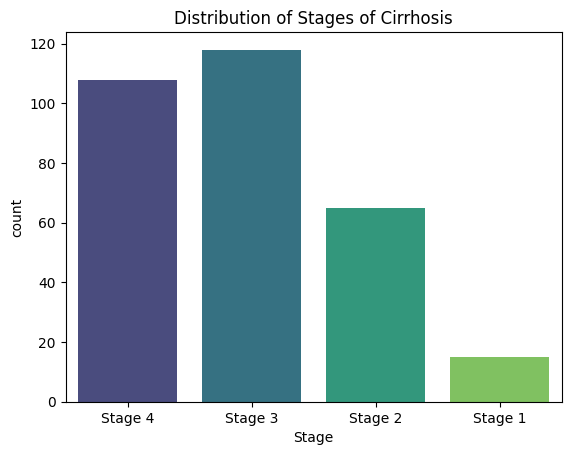

In [52]:
# Distribution of the target variable (Stage)
print("\nStage Distribution:")
print(df['Stage'].value_counts())
sns.countplot(data=df, x="Stage", palette="viridis")
plt.title("Distribution of Stages of Cirrhosis")
plt.show()


Stages 3 and 4 of cirrhosis are the most commonly observed, indicating that many patients are diagnosed at advanced stages. In contrast, Stages 1 and 2 have significantly fewer cases.

In [53]:
df.drop(columns=['Registration Date'], inplace=True)

In [54]:
# Separating numeric and categorical columns using the select_dtypes function from pandas

# Selecting numeric columns
num_columns = df.select_dtypes(include=['number']).columns.tolist()

# Selecting categorical columns
category_columns = df.select_dtypes(exclude=['number']).columns.tolist()

# Displaying categorical and numeric columns
print(f'Categorical: {category_columns}')
print(f'Numeric: {num_columns}')

Categorical: ['Drug', 'Gender', 'Ascites', 'Hepatomegaly', 'Edema', 'Stage']
Numeric: ['ID', 'Bilirubin', 'Albumin', 'Copper', 'Alkaline Phospatase (U/L)', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age']


In [55]:
# Count the categorical values in each columns
for i in category_columns:
    print(df[i].value_counts(),'\n')

Drug
d-penicillamine    155
placebo            151
Name: count, dtype: int64 

Gender
F    271
M     35
Name: count, dtype: int64 

Ascites
N    283
Y     23
Name: count, dtype: int64 

Hepatomegaly
Y    156
N    150
Name: count, dtype: int64 

Edema
N    258
S     28
Y     20
Name: count, dtype: int64 

Stage
Stage 3    118
Stage 4    108
Stage 2     65
Stage 1     15
Name: count, dtype: int64 



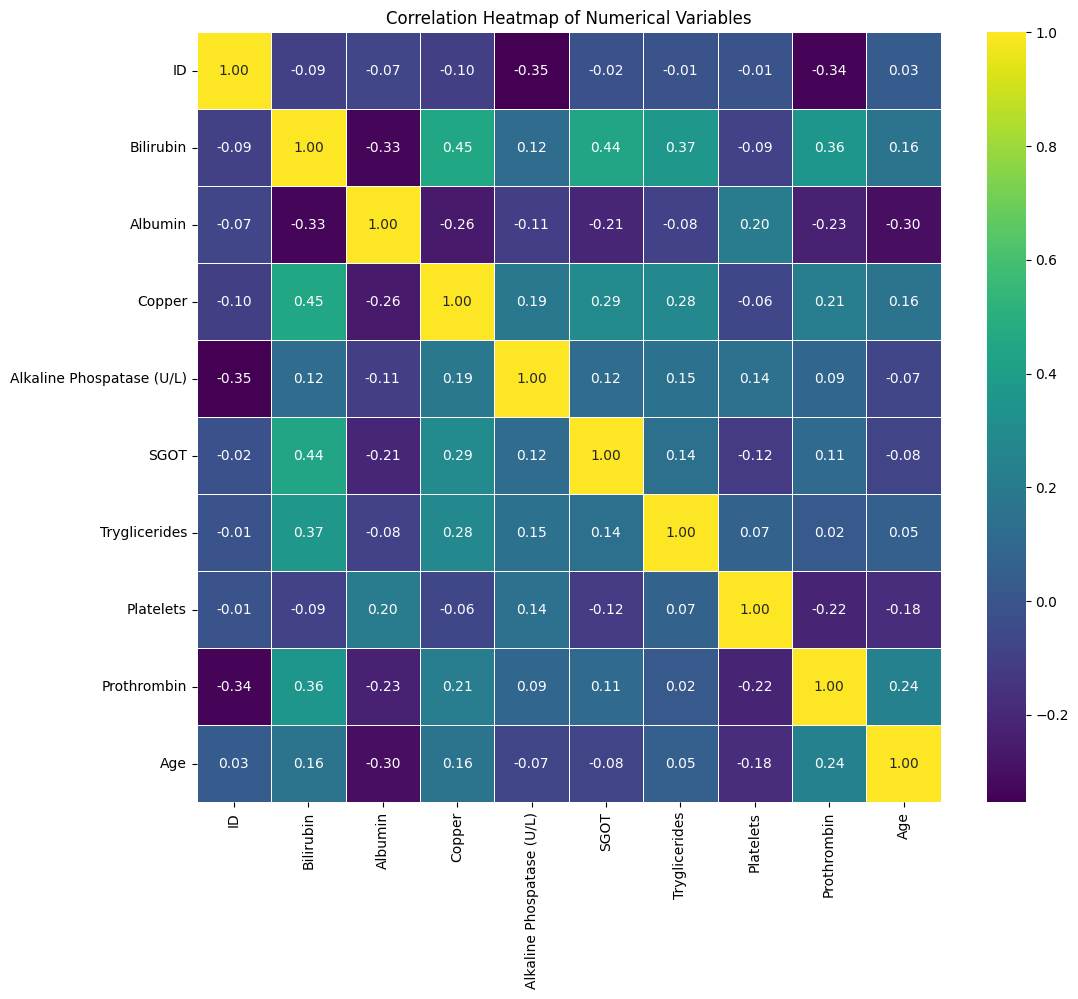

In [ ]:
# Select numeric columns using the DataFrame method
numerical_cols = df.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numerical_cols.corr()

fig, ax = plt.subplots(figsize=(12, 10))  # Use subplots to adjust the size
sns.heatmap(corr_matrix, annot=True, cmap='viridis', linewidths=0.5, fmt=".2f", ax=ax)
ax.set_title('Correlation Heatmap of Numerical Variables')
plt.show()

Bilirubin shows a moderate positive correlation with Copper (0.45) and SGOT (0.44), suggesting these may increase together.
Albumin has a moderate negative correlation with Bilirubin (-0.33) and Age (-0.30), indicating lower albumin levels in older individuals or those with higher bilirubin.
Prothrombin has weak to moderate negative correlations with Bilirubin (-0.36) and Albumin (-0.23).
Most other variables exhibit weak or negligible correlations, as shown by values close to zero.








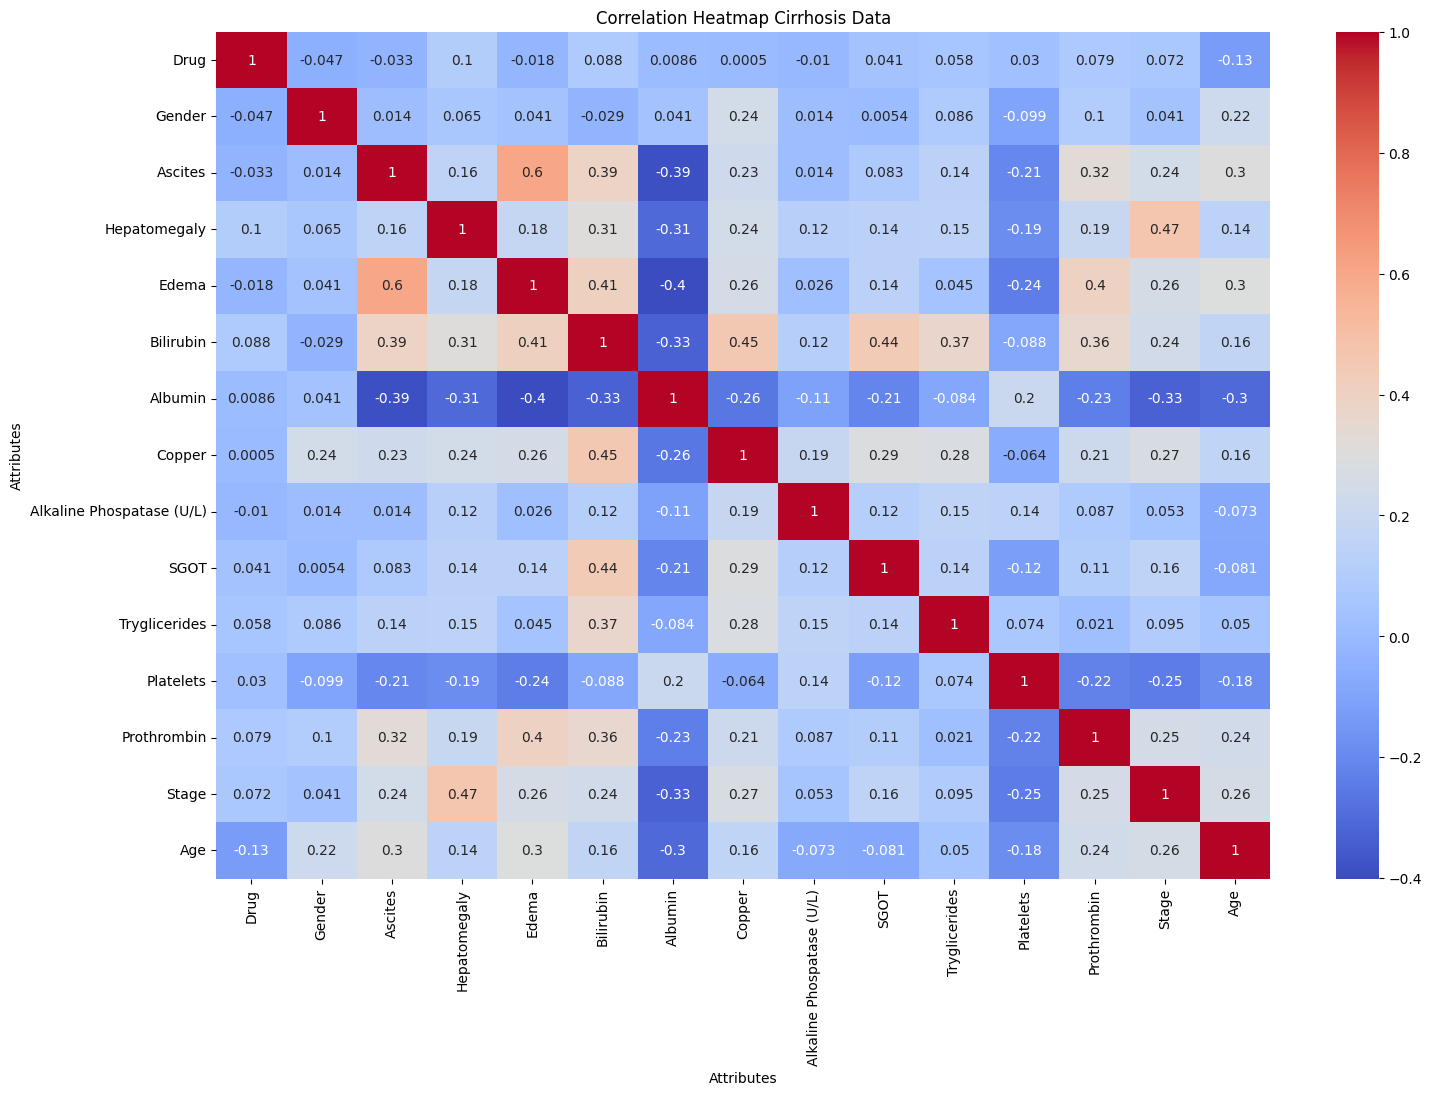

In [57]:
# Import library
from sklearn.preprocessing import LabelEncoder
data = df.copy()
data.drop(columns=["ID"], inplace=True)
bin_enc = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = bin_enc.fit_transform(data[col].astype(str))

correlation_matrix_all = data.corr()

plt.figure(figsize=(17, 11))
sns.heatmap(correlation_matrix_all, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap Cirrhosis Data")
plt.xlabel("Attributes")
plt.ylabel("Attributes")
plt.show()

shows a correlation heatmap between attributes of cirrhosis data. Red colors indicate strong positive correlations, while blue colors indicate negative correlations. For example, "Albumin" has a negative correlation with "Bilirubin," while "Stage" has a positive correlation with "Prothrombin."

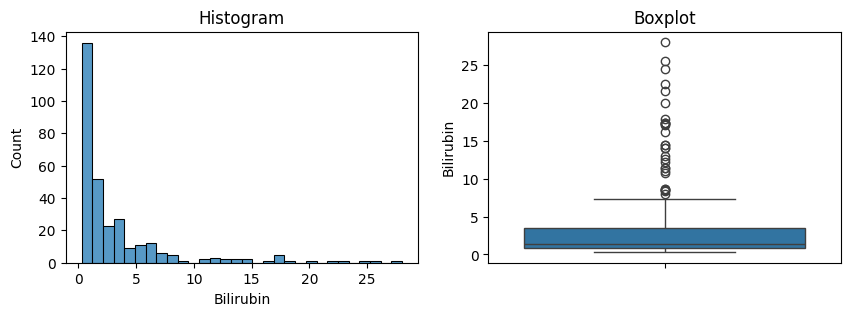

Skewness: 2.817540214492091
Kurtosis: 8.680667490516994


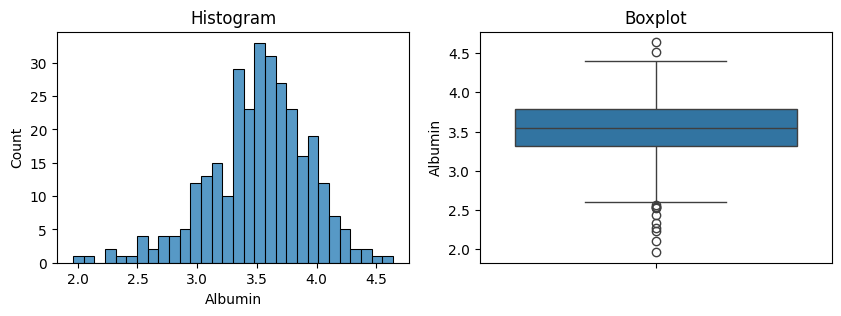

Skewness: -0.5782674450898165
Kurtosis: 0.9638761384912069


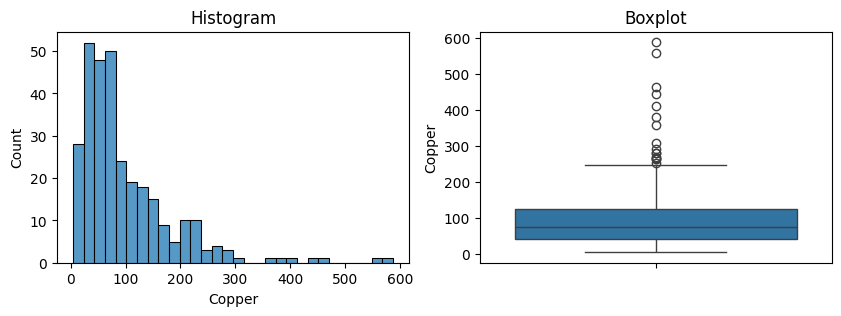

Skewness: 2.2856431823652814
Kurtosis: 7.515563507128517


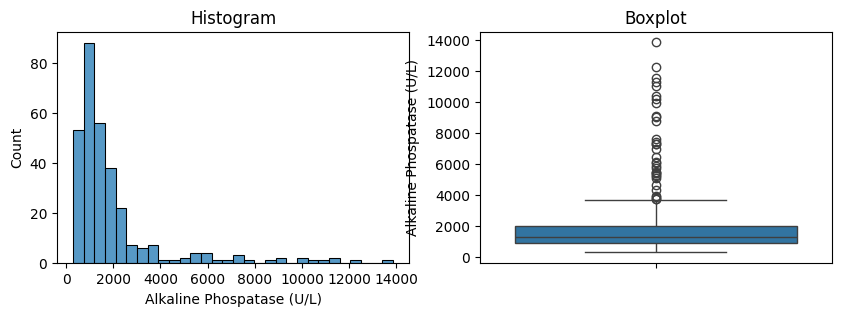

Skewness: 3.005139813159215
Kurtosis: 9.723126571888724


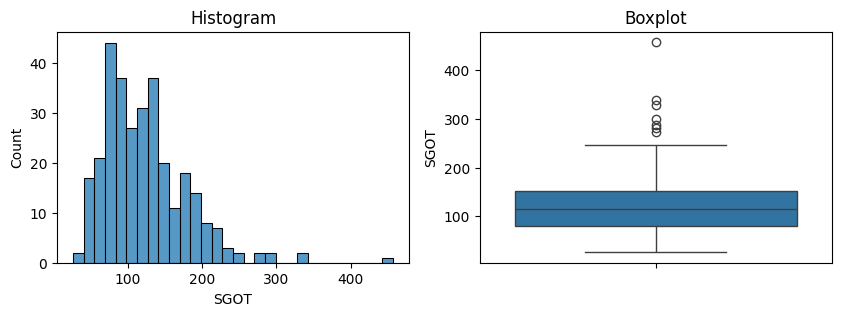

Skewness: 1.4474186250483927
Kurtosis: 4.289812936450611


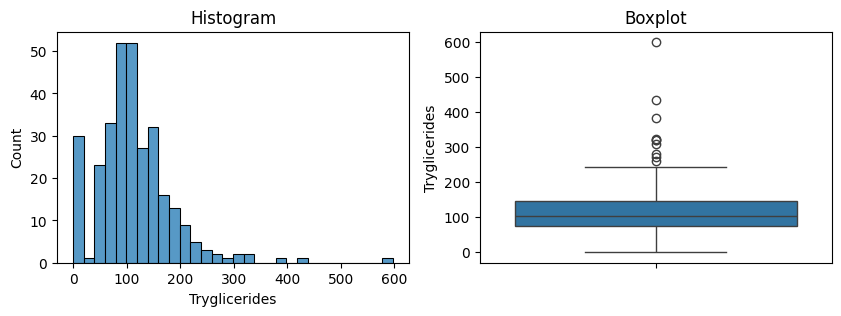

Skewness: 1.673768524651463
Kurtosis: 7.7356324734000665


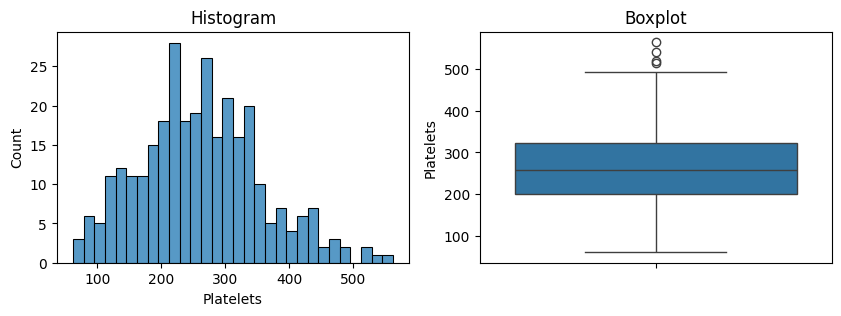

Skewness: 0.3734854844035126
Kurtosis: -0.005941626677032907


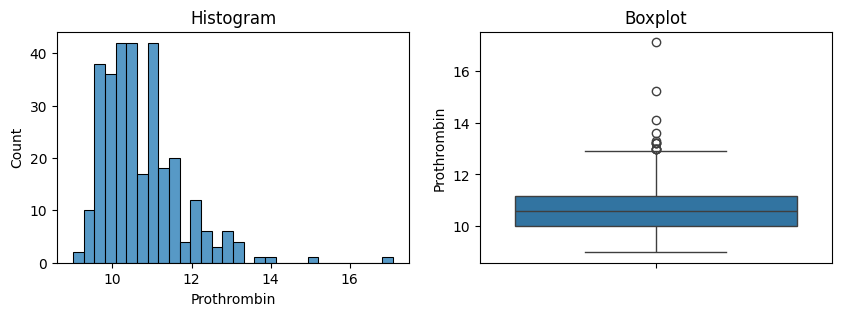

Skewness: 1.7392944630320002
Kurtosis: 6.018483343031384


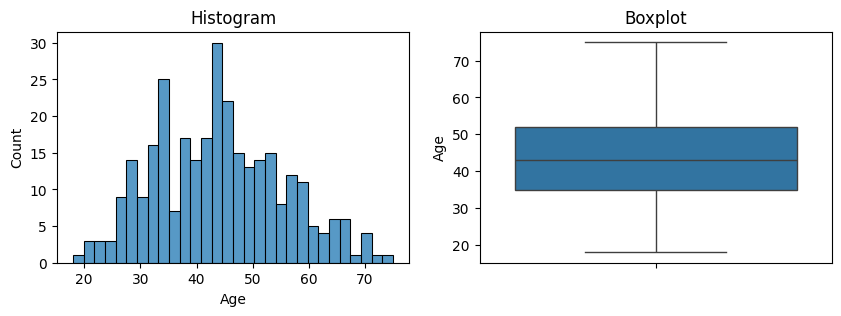

Skewness: 0.265483328479276
Kurtosis: -0.4333659789060884


In [58]:
# Make a plot to check distribution
def check_distribution_outliers(df, columns):
    for i in columns[1:]:
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[i], bins=30)
        plt.title('Histogram')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[i])
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[i].skew())
        print('Kurtosis:', df[i].kurt())

check_distribution_outliers(df[num_columns], num_columns)

we can see from the plot there is no outliers that too significant

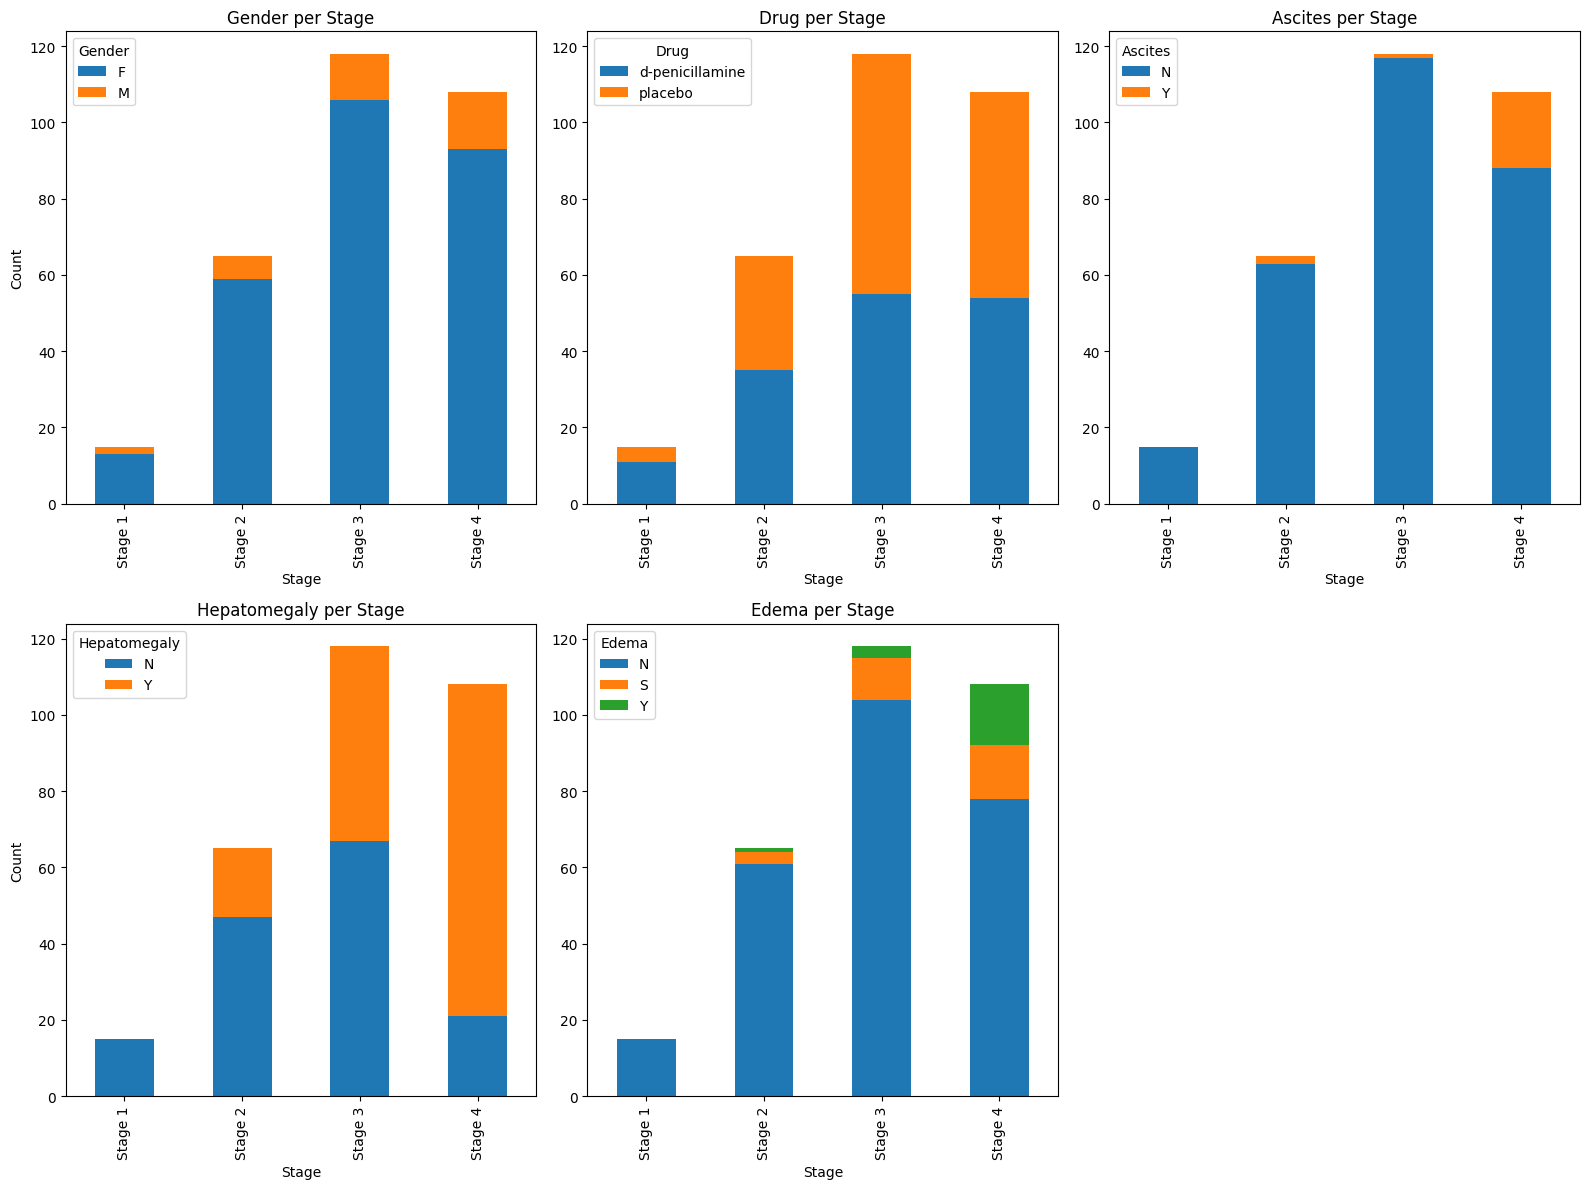

In [59]:
# Prepare stacked bar plots data
gender_stage = pd.crosstab(df['Stage'], df['Gender'])
drug_stage = pd.crosstab(df['Stage'], df['Drug'])
ascites_stage = pd.crosstab(df['Stage'], df['Ascites'])
hepatomegaly_stage = pd.crosstab(df['Stage'], df['Hepatomegaly'])
edema_stage = pd.crosstab(df['Stage'], df['Edema'])

# Plotting stacked bar plots for categorical variables (5 plots)
fig, axes = plt.subplots(2, 3, figsize=(16, 12))  # Adjusted grid to 2x3 to allow 5 plots

# Gender per Stage
gender_stage.plot(kind='bar', stacked=True, ax=axes[0, 0])
axes[0, 0].set_title('Gender per Stage')
axes[0, 0].set_ylabel('Count')

# Drug per Stage
drug_stage.plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('Drug per Stage')

# Ascites per Stage
ascites_stage.plot(kind='bar', stacked=True, ax=axes[0, 2])
axes[0, 2].set_title('Ascites per Stage')

# Hepatomegaly per Stage
hepatomegaly_stage.plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title('Hepatomegaly per Stage')
axes[1, 0].set_ylabel('Count')

# Edema per Stage
edema_stage.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('Edema per Stage')

# Remove the empty plot by turning off the last axis
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

The charts compare various attributes across stages of the disease:

Gender per Stage: Both males (M) and females (F) increase in number as the disease progresses, with more males in later stages.
Drug per Stage: Both treatments (d-penicillamine and placebo) are distributed across all stages, with slightly more placebo cases.
Ascites per Stage: The presence of ascites (Y) increases with disease severity.
Hepatomegaly per Stage: Hepatomegaly (Y) is more common in later stages.
Edema per Stage: Severe edema (S) and its presence (Y) are more frequent in advanced stages.

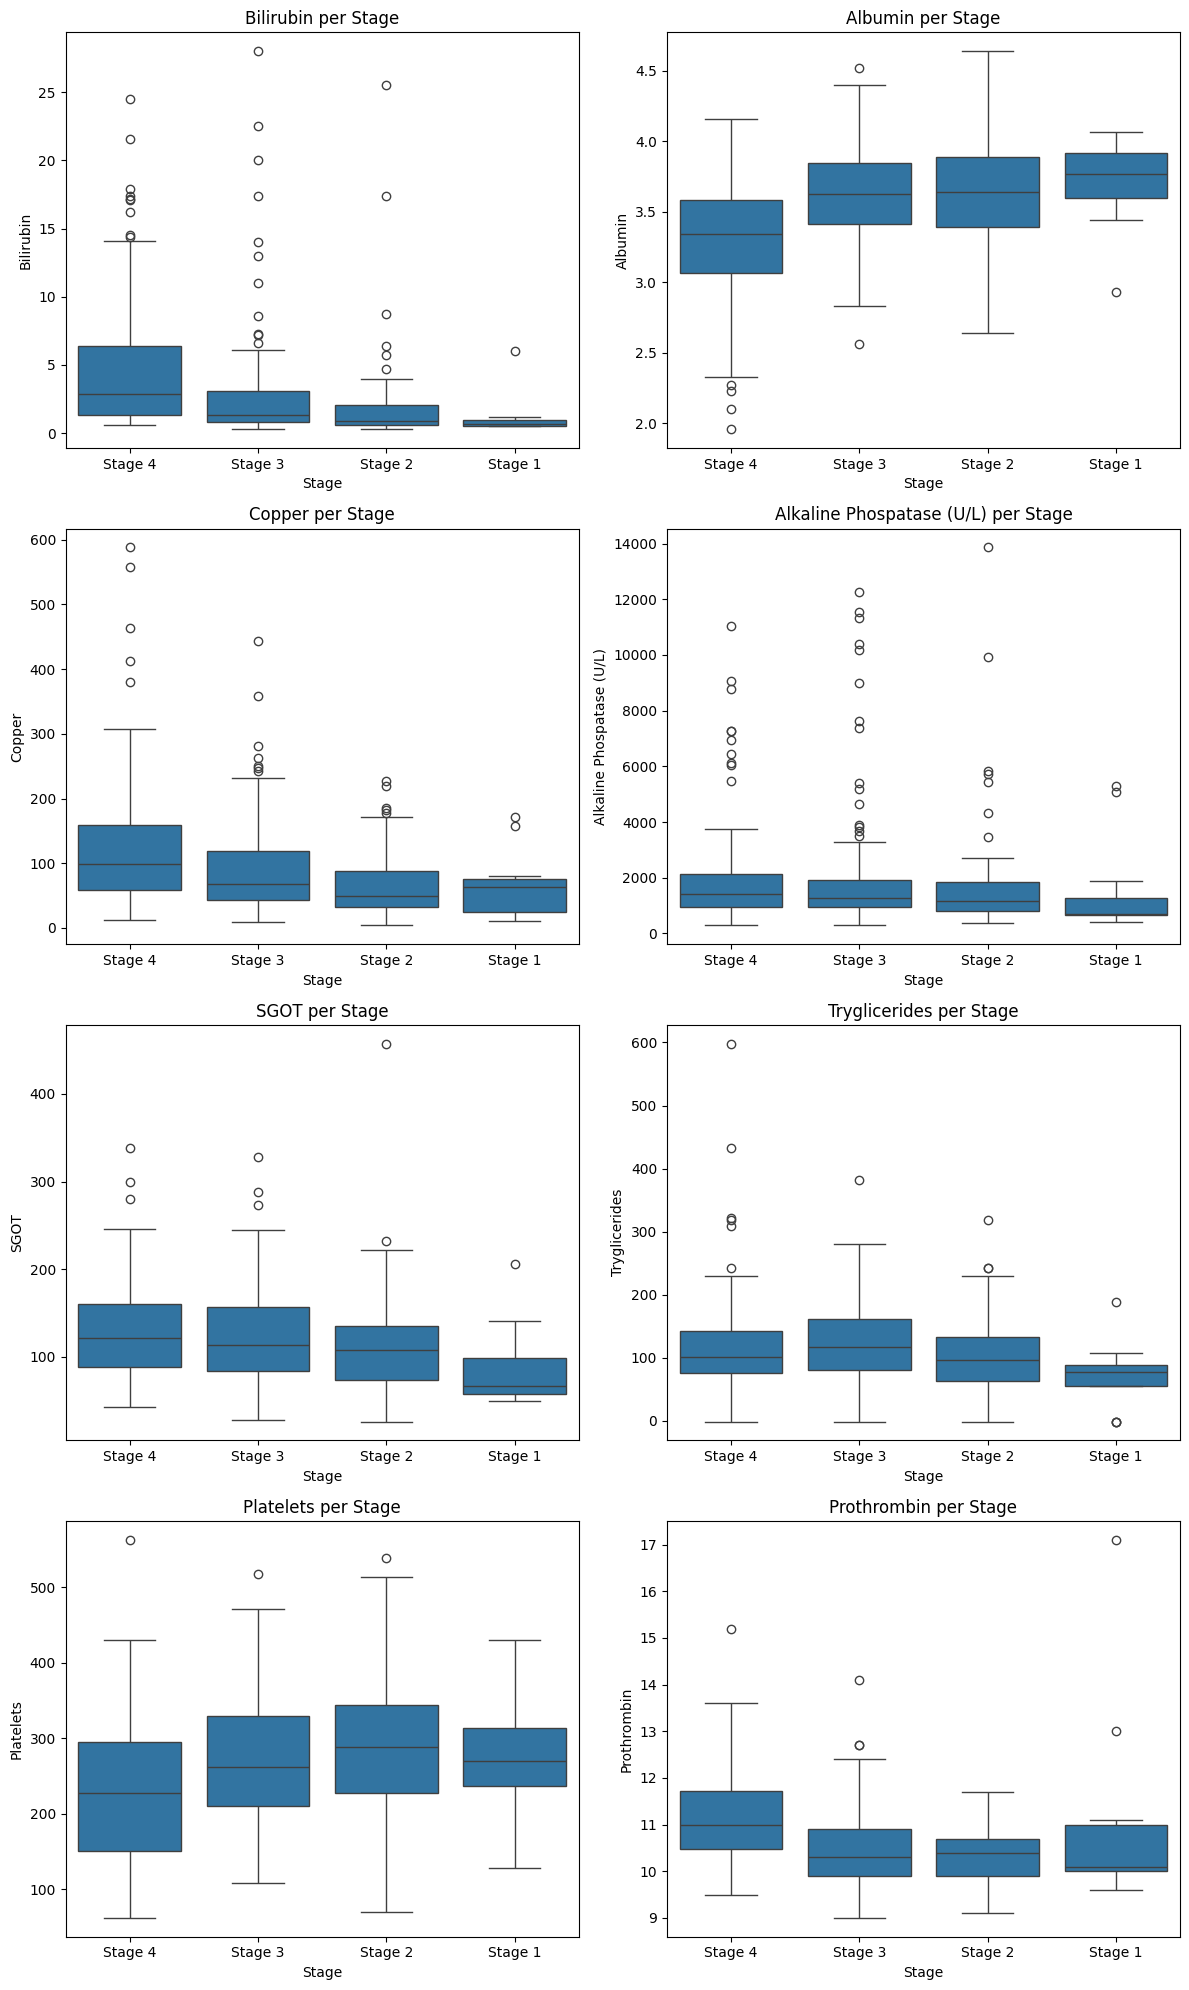

In [60]:
# Boxplots for continuous variables
fig, axes = plt.subplots(4, 2, figsize=(12, 20))
boxplot_vars = ['Bilirubin', 'Albumin', 'Copper', 'Alkaline Phospatase (U/L)', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

for i, var in enumerate(boxplot_vars):
    sns.boxplot(x='Stage', y=var, data=df, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{var} per Stage')
    axes[i//2, i%2].set_ylabel(var)
    axes[i//2, i%2].set_xlabel('Stage')

plt.tight_layout()
plt.show()


we can see there is some outliers

# **Preprocess The Data**

In [61]:
# Delete identifier
df.drop(columns=["ID"], inplace=True)

In [62]:
df.head()

,Drug,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age
0,d-penicillamine,F,Y,Y,Y,14.5,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage 4,57
1,d-penicillamine,F,N,Y,N,1.1,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,Stage 3,44
2,d-penicillamine,M,N,N,S,1.4,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage 4,67
3,d-penicillamine,F,N,Y,S,1.8,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage 4,49
4,placebo,F,N,Y,N,3.4,3.53,143.0,671.0,113.15,72.0,136.0,10.9,Stage 3,34


In [63]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns that need to be encoded, including 'Stage'
categorical_columns = ['Gender', 'Drug', 'Ascites', 'Hepatomegaly', 'Edema', 'Stage']

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Show the first few rows of the modified DataFrame
df.head()


,Drug,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age
0,0,0,1,1,2,14.5,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,3,57
1,0,0,0,1,0,1.1,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,2,44
2,0,1,0,0,1,1.4,3.48,210.0,516.0,96.10,55.0,151.0,12.0,3,67
3,0,0,0,1,1,1.8,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,3,49
4,1,0,0,1,0,3.4,3.53,143.0,671.0,113.15,72.0,136.0,10.9,2,34


# **Data Splitting**

In [64]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame with encoded categorical variables

# Define the target variable (e.g., 'Stage')
X = df.drop('Stage', axis=1)  # Drop the target column from features
y = df['Stage']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of the split data
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


print("Distribution of target variable in Training Set:")
print(y_train.value_counts())
print("\nDistribution of target variable in Test Set:")
print(y_test.value_counts())

Training set shape: (244, 14)
Testing set shape: (62, 14)
Distribution of target variable in Training Set:
Stage
2    91
3    89
1    51
0    13
Name: count, dtype: int64

Distribution of target variable in Test Set:
Stage
2    27
3    19
1    14
0     2
Name: count, dtype: int64


# **Oversampling**

In [65]:
from imblearn.over_sampling import SMOTE

# Check class distribution before balancing
print("Class distribution before balancing:")
print(y_train.value_counts())

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after balancing
print("\nClass distribution after balancing:")
print(y_train_resampled.value_counts())


Class distribution before balancing:
Stage
2    91
3    89
1    51
0    13
Name: count, dtype: int64

Class distribution after balancing:
Stage
2    91
1    91
3    91
0    91
Name: count, dtype: int64


In [66]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)  # Scaling data pelatihan
X_test_scaled = scaler.transform(X_test)  # Scaling data uji, menggunakan parameter yang sama seperti di data pelatihan

# **Find Best Model**

Evaluasi Random Forest:
Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      0.36      0.34        14
           2       0.77      0.37      0.50        27
           3       0.53      0.84      0.65        19

    accuracy                           0.50        62
   macro avg       0.41      0.39      0.37        62
weighted avg       0.57      0.50      0.50        62



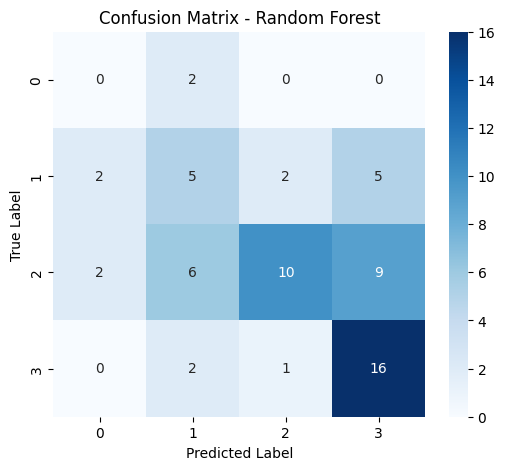

c:\Users\Joseph Elk\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py:158: UserWarning: [19:32:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Evaluasi XGBoost:
Accuracy: 0.5806451612903226
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.45      0.36      0.40        14
           2       0.75      0.56      0.64        27
           3       0.55      0.84      0.67        19

    accuracy                           0.58        62
   macro avg       0.44      0.44      0.43        62
weighted avg       0.60      0.58      0.57        62



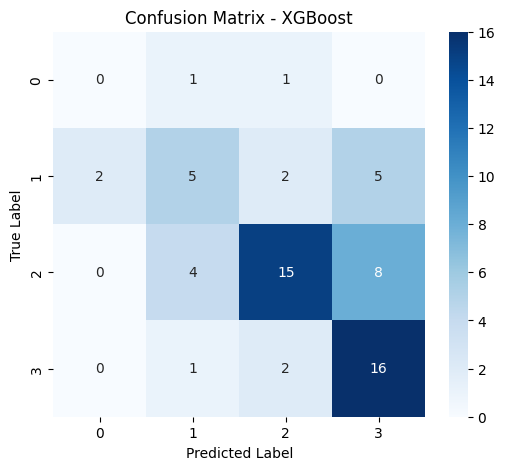

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Misalnya data sudah di-resample dan di-scale seperti sebelumnya

# 1. Melatih Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)  # Latih model dengan data pelatihan yang sudah di-resample dan di-scale

# Memprediksi data uji
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluasi Random Forest
print("Evaluasi Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))  # Menghitung akurasi
print(classification_report(y_test, y_pred_rf))  # Menghasilkan classification report

# Plot Confusion Matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 2. Melatih XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_resampled, y_train_resampled)  # Latih model XGBoost dengan data pelatihan yang sudah di-resample dan di-scale

# Memprediksi data uji
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluasi XGBoost
print("\nEvaluasi XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))  # Menghitung akurasi
print(classification_report(y_test, y_pred_xgb))  # Menghasilkan classification report

# Plot Confusion Matrix untuk XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


The evaluation of the Random Forest model shows suboptimal performance with an accuracy of 0.50. For Class 0, the model fails completely, as both precision and recall are 0.00, indicating it cannot predict this class. For Class 2, precision is relatively high at 0.77, but the recall is much lower at 0.37, meaning the model frequently misclassifies samples from this class. Class 3 performs better overall, with a recall of 0.84, showing the model's strength in identifying this class, although the precision is only 0.53. These results highlight the model's difficulty in handling class imbalance and suggest the need for improvements such as data balancing or hyperparameter tuning.







The evaluation of the XGBoost model indicates moderate performance with an accuracy of 0.58. For Class 0, the model performs poorly, with both precision and recall at 0.00, failing to predict this class entirely. For Class 2, the model achieves a relatively high precision of 0.75 but a lower recall of 0.56, suggesting frequent misclassifications. Class 3 performs the best overall, with a recall of 0.84 and an F1-score of 0.67, showing the model's effectiveness in identifying this class. While the model performs better than Random Forest, it still struggles with class imbalance, and further improvements such as resampling or parameter optimization may be needed.









# **Fine Tuning**

Best Random Forest Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 300}
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      0.14      0.25        14
           2       0.57      0.63      0.60        27
           3       0.53      0.84      0.65        19

    accuracy                           0.56        62
   macro avg       0.53      0.40      0.37        62
weighted avg       0.64      0.56      0.52        62



c:\Users\Joseph Elk\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Joseph Elk\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Joseph Elk\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

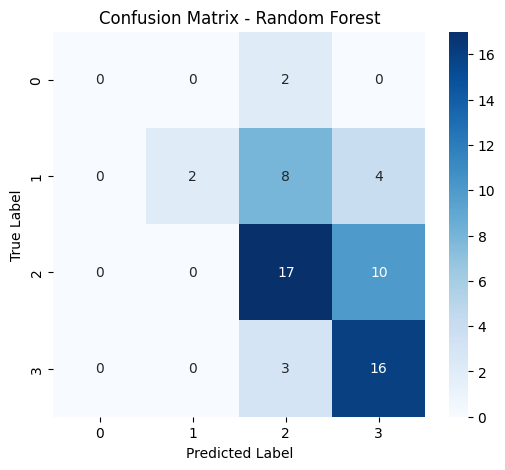

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Hyperparameter search space
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'max_features': ['sqrt', 'log2', None]
}

# Random Forest Model
rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Best Model
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluate
print("Best Random Forest Parameters:", grid_search_rf.best_params_)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


After fine-tuning, the results actually improved.

Fitting 5 folds for each of 180 candidates, totalling 900 fits


c:\Users\Joseph Elk\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\core.py:158: UserWarning: [19:50:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Optimal Parameters: {'colsample_bytree': 0.6, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best F1 Score: 0.6537926991871952

Evaluation of the Best XGB Model
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.38      0.21      0.27        14
           2       0.80      0.59      0.68        27
           3       0.52      0.84      0.64        19

    accuracy                           0.56        62
   macro avg       0.42      0.41      0.40        62
weighted avg       0.59      0.56      0.55        62



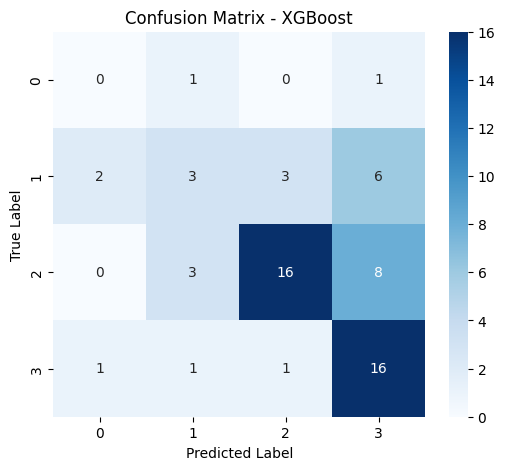

In [71]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Inisialisasi model XGBoost
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Definisi parameter grid untuk tuning hyperparameter
xgb_params = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.2, 0.4, 0.6, 0.8]
}

# Inisialisasi GridSearchCV untuk pencarian parameter terbaik
xgb_grid_search = GridSearchCV(
    estimator=xgboost_model,
    param_grid=xgb_params,
    scoring='f1_macro',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Melatih GridSearchCV dengan data pelatihan yang sudah di-resample dan di-scale
xgb_grid_search.fit(X_train_resampled, y_train_resampled)

# Menampilkan parameter terbaik dan skor terbaik
print("Optimal Parameters:", xgb_grid_search.best_params_)
print("Best F1 Score:", xgb_grid_search.best_score_)

# Mendapatkan model terbaik dari hasil GridSearchCV
optimal_xgb_model = xgb_grid_search.best_estimator_

# Melakukan prediksi dengan model terbaik pada data uji
y_test_predictions = optimal_xgb_model.predict(X_test_scaled)

# Evaluasi performa model terbaik
print("\nEvaluation of the Best XGB Model")

print("Classification Report:")
print(classification_report(y_test, y_test_predictions))

cm_xg = confusion_matrix(y_test, y_test_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xg, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

After fine-tuning, the results actually decreased.

From the comparison of these two models, the difference is not that significant, but if we look at the overall metrics, XGBoost performs better.

# **Feature Importances on the Best Model**

                      Feature  Importance
3                Hepatomegaly    0.216290
2                     Ascites    0.113997
0                        Drug    0.087818
13                        Age    0.069226
8   Alkaline Phospatase (U/L)    0.066931
12                Prothrombin    0.060427
5                   Bilirubin    0.053903
7                      Copper    0.052130
1                      Gender    0.051035
9                        SGOT    0.049868
10              Tryglicerides    0.048861
6                     Albumin    0.048083
11                  Platelets    0.044667
4                       Edema    0.036763


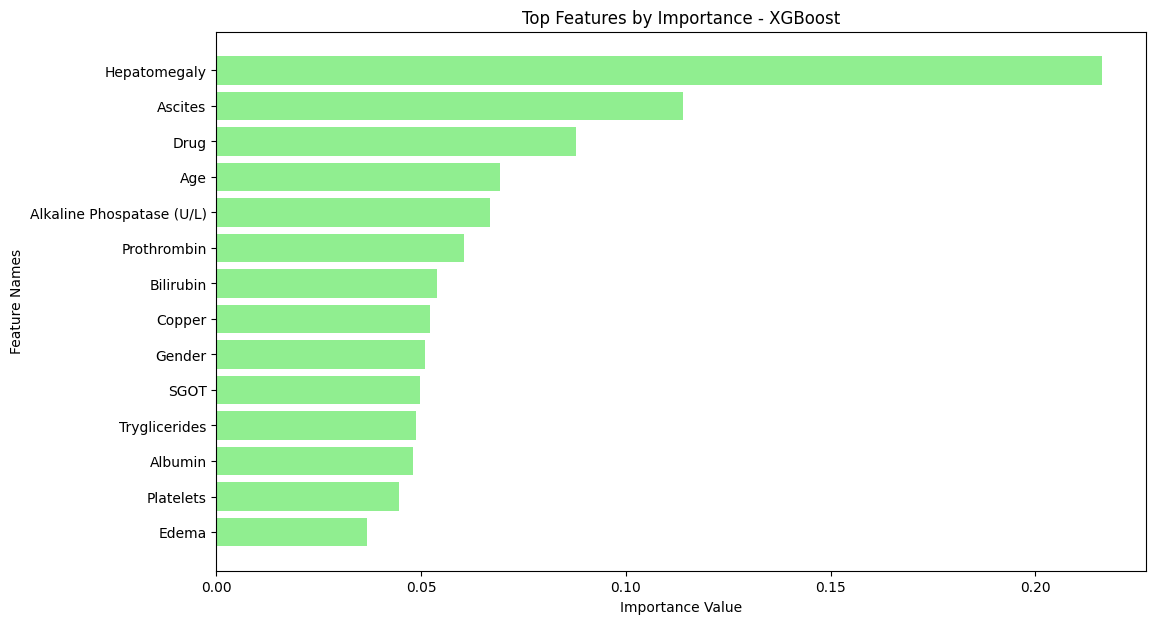

In [72]:
# Mendapatkan nilai penting fitur dari model Random Forest
importance_scores = optimal_xgb_model.feature_importances_

# Menyusun nama fitur berdasarkan dataframe yang digunakan
feature_list = X.columns

# Membuat dataframe yang berisi fitur dan nilai pentingnya
importance_data = pd.DataFrame({
    'Feature': feature_list,
    'Importance': importance_scores
})

# Mengurutkan berdasarkan nilai penting fitur
sorted_importance = importance_data.sort_values(by='Importance', ascending=False)
print(sorted_importance)

# Menampilkan grafik horizontal dari nilai penting fitur
plt.figure(figsize=(12, 7))
plt.barh(sorted_importance['Feature'], sorted_importance['Importance'], color='lightgreen')
plt.gca().invert_yaxis()  # Membalik urutan sumbu Y agar fitur paling penting muncul di atas
plt.title('Top Features by Importance - XGBoost')
plt.xlabel('Importance Value')
plt.ylabel('Feature Names')
plt.show()


we can see the feature importance of the best model that XGBoost is Hepatomegaly